# Importing Libraries

In [235]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn import svm

# Loading Data

In [236]:
data = pd.read_csv('telecom_users.csv')

# Data Summary and Statistics

In [237]:
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


# Column Description

1 customerID - customer id

2 gender - client gender (male / female)

3 SeniorCitizen - is the client retired (1, 0)

4 Partner - is the client married (Yes, No)

5 tenure - how many months a person has been a client of the company

6 PhoneService - is the telephone service connected (Yes, No)

7 MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

8 InternetService - client's Internet service provider (DSL, Fiber optic, No)

9 OnlineSecurity - is the online security service connected (Yes, No, No internet service)

10 OnlineBackup - is the online backup service activated (Yes, No, No internet service)

11 DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

12 TechSupport - is the technical support service connected (Yes, No, No internet service)

13 StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

14 StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

15 Contract - type of customer contract (Month-to-month, One year, Two year)

16 PaperlessBilling - whether the client uses paperless billing (Yes, No)

17 PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

18 MonthlyCharges - current monthly payment

19 TotalCharges - the total amount that the client paid for the services for the entire time

20 Dependents - (Yes or no)

21 Churn - whether there was a churn (Yes or No)

In [238]:
data.drop(['Unnamed: 0', 'customerID'], axis=1, inplace=True)        # dropping 2 columns

In [239]:
data.info()                                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [240]:
data.describe(include ='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


In [241]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  #converting object datatype to float of column TotalCharges
data['TotalCharges'].isna().value_counts()                                   #counting null values in column totalcharges

False    5976
True       10
Name: TotalCharges, dtype: int64

In [242]:
data[pd.isnull(data['TotalCharges'])]                               #loading corresponding rows which have totalcharges null value

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [243]:
data.fillna(0, inplace=True)               #replacing nan values with 0

# Exploratory Data Analysis

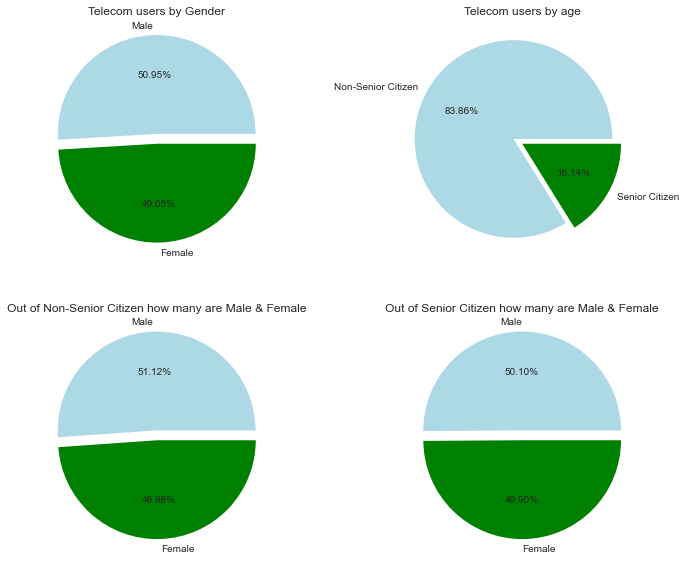

In [244]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))
colors=["lightblue","green"]
explode = [0.1,0]
ax[0,0].pie(data['gender'].value_counts(), autopct='%.2f%%', labels=data['gender'].unique(), colors=colors,explode=explode)
ax[0,0].set_title('Telecom users by Gender')
ax[0,1].pie(data['SeniorCitizen'].value_counts(), autopct='%.2f%%', labels=['Non-Senior Citizen','Senior Citizen'], colors=colors,explode=explode)
ax[0,1].set_title('Telecom users by age')
ax[1,1].pie(data[data['SeniorCitizen']==1]['gender'].value_counts(), autopct='%.2f%%', labels=['Male','Female'],colors=colors,explode=explode)
ax[1,1].set_title('Out of Senior Citizen how many are Male & Female')
ax[1,0].pie(data[data['SeniorCitizen']==0]['gender'].value_counts(), autopct='%.2f%%', labels=['Male','Female'],colors=colors,explode=explode)
ax[1,0].set_title('Out of Non-Senior Citizen how many are Male & Female')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

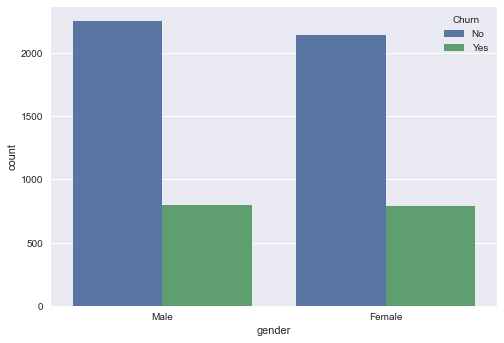

In [245]:
sns.countplot(data = data, x = 'gender', hue = 'Churn')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

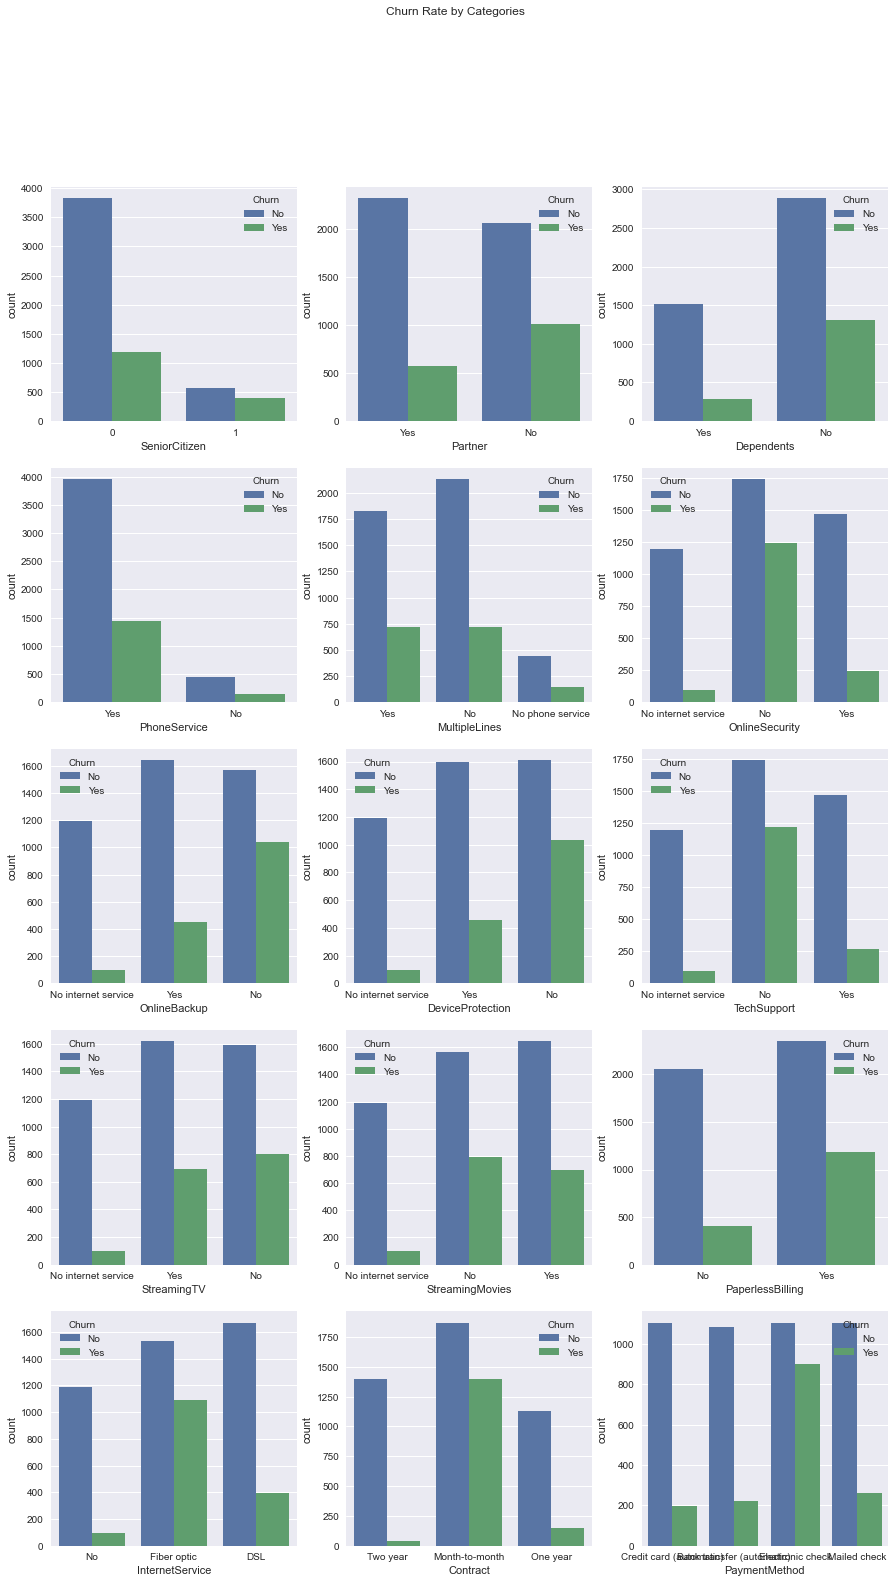

In [246]:
fig, axes = plt.subplots(5, 3, figsize=(15, 25))

fig.suptitle('Churn Rate by Categories')

sns.countplot(ax=axes[0, 0], data=data, x='SeniorCitizen', hue='Churn')
sns.countplot(ax=axes[0, 1], data=data, x='Partner', hue='Churn')
sns.countplot(ax=axes[0, 2], data=data, x='Dependents', hue='Churn')
sns.countplot(ax=axes[1, 0], data=data, x='PhoneService', hue='Churn')
sns.countplot(ax=axes[1, 1], data=data, x='MultipleLines', hue='Churn')
sns.countplot(ax=axes[1, 2], data=data, x='OnlineSecurity', hue='Churn')
sns.countplot(ax=axes[2, 0], data=data, x='OnlineBackup', hue='Churn')
sns.countplot(ax=axes[2, 1], data=data, x='DeviceProtection', hue='Churn')
sns.countplot(ax=axes[2, 2], data=data, x='TechSupport', hue='Churn')
sns.countplot(ax=axes[3, 0], data=data, x='StreamingTV', hue='Churn')
sns.countplot(ax=axes[3, 1], data=data, x='StreamingMovies', hue='Churn')
sns.countplot(ax=axes[3, 2], data=data, x='PaperlessBilling', hue='Churn')
sns.countplot(ax=axes[4, 0], data=data, x='InternetService', hue='Churn')
sns.countplot(ax=axes[4, 1], data=data, x='Contract', hue='Churn')
sns.countplot(ax=axes[4, 2], data=data, x='PaymentMethod', hue='Churn')

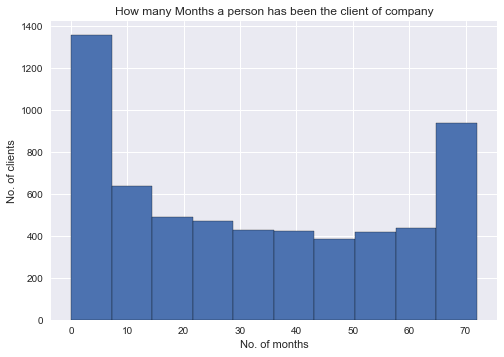

In [247]:
plt.hist(data['tenure'],edgecolor = 'black')
plt.title("How many Months a person has been the client of company")
plt.xlabel("No. of months")
plt.ylabel("No. of clients")
plt.show()

In [248]:
mon = data['tenure'].mean()
mon/12

2.7057300367524224

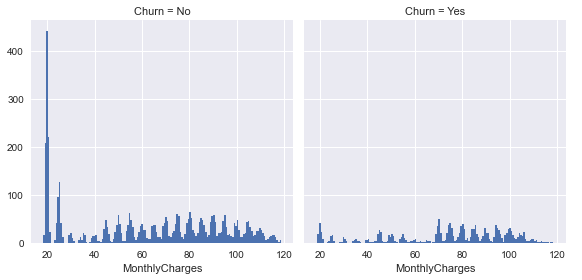

In [249]:
grid = sns.FacetGrid(data, col='Churn', height=4, aspect=1)
grid.map(plt.hist, 'MonthlyCharges', bins=150)
grid.add_legend()
plt.show()

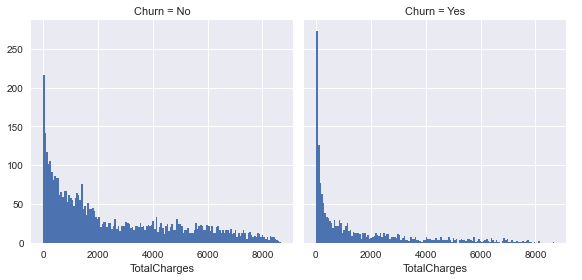

In [250]:
grid = sns.FacetGrid(data, col='Churn', height=4, aspect=1)
grid.map(plt.hist, 'TotalCharges', bins=150)
grid.add_legend()
plt.show()

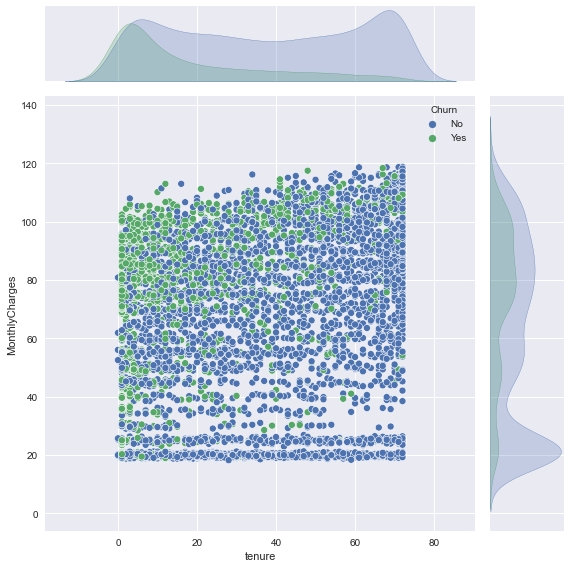

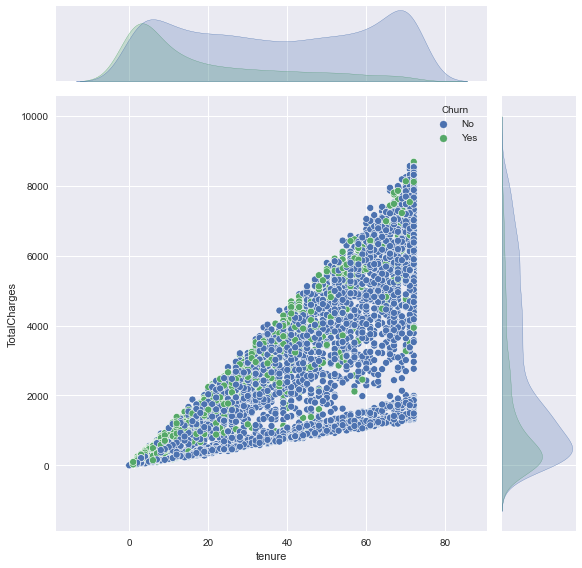

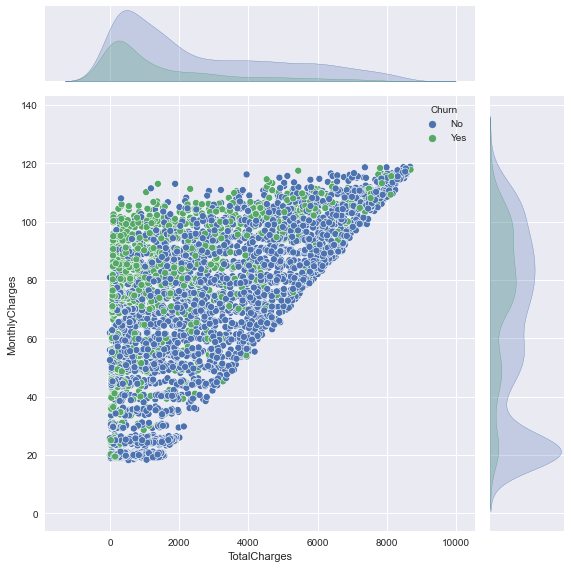

In [251]:
sns.jointplot(data = data, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', hue_order = ['No', 'Yes'], height = 8);
sns.jointplot(data = data, x = 'tenure', y = 'TotalCharges', hue = 'Churn', hue_order = ['No', 'Yes'], height = 8);
sns.jointplot(data = data, x = 'TotalCharges', y = 'MonthlyCharges', hue = 'Churn', hue_order = ['No', 'Yes'], height = 8);

# Preprocessing

In [252]:
data=pd.get_dummies(data, columns=['InternetService','PaymentMethod','Contract'], drop_first=True)  #one hot coding

In [253]:
data=data.replace('Yes',1)                                  #label encoding
data=data.replace('No',0)
data=data.replace('No internet service',0)
data=data.replace('No phone service',0)
data=data.replace('Male',1)
data=data.replace('Female',0)

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5986 non-null   int64  
 1   SeniorCitizen                          5986 non-null   int64  
 2   Partner                                5986 non-null   int64  
 3   Dependents                             5986 non-null   int64  
 4   tenure                                 5986 non-null   int64  
 5   PhoneService                           5986 non-null   int64  
 6   MultipleLines                          5986 non-null   int64  
 7   OnlineSecurity                         5986 non-null   int64  
 8   OnlineBackup                           5986 non-null   int64  
 9   DeviceProtection                       5986 non-null   int64  
 10  TechSupport                            5986 non-null   int64  
 11  Stre

In [255]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,1,0,1,1,72,1,1,0,0,0,...,24.10,1734.65,0,0,1,1,0,0,0,1
1,0,0,0,0,44,1,0,0,1,1,...,88.15,3973.20,0,1,0,1,0,0,0,0
2,0,1,1,0,38,1,1,0,0,0,...,74.95,2869.85,1,1,0,0,0,0,0,0
3,1,0,0,0,4,1,0,0,0,0,...,55.90,238.50,0,0,0,0,1,0,0,0
4,1,0,0,0,2,1,0,1,0,1,...,53.45,119.50,0,0,0,0,1,0,0,0


In [256]:
data.isna().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Contract_One year                        0
Contract_Tw

In [257]:
x = data.drop(['Churn'], axis=1)                   #predictors
y = data['Churn']                                 #target variable

In [258]:
y.value_counts()                               #data is unbalanced

0    4399
1    1587
Name: Churn, dtype: int64

In [259]:
scaler = StandardScaler()                         #intialising scaler

In [260]:
inner_cv = KFold(n_splits=3, shuffle=True, random_state=22)   #defining inner kfold cv for hyperparameter tuning
outer_cv = KFold(n_splits=5, shuffle=True, random_state=22)   # defining outer kfold cv for model selection

In [261]:
#defining parameters to be tuned in each model
param_grid_reg = {
    'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear']
}

param_grid_knn = {
    'classifier__n_neighbors': [1,3,5,7,10,15,20],
    'classifier__metric': ['euclidean', 'manhattan'],
    'classifier__weights' : ['uniform', 'distance']
}

param_grid_svm = {
    'classifier__kernel': ['poly', 'rbf'],
    'classifier__C': [0.01, 1, 5, 10, 100]
}

# create dictionary of classifiers with the classifier and paramaters as value 
classifiers = {
               "reg": (LogisticRegression(max_iter=1000), param_grid_reg),
               'knn': (KNeighborsClassifier(), param_grid_knn),
               'svm': (SVC(), param_grid_svm)
}

In [262]:
# empty dictionary to store each model pipeline and respective params as values
models_params = {}

# loop over to fill dictionary
for classifier_name, classifier in classifiers.items():
    pipe = Pipeline(steps=[('scaler', scaler),('sampling', SMOTE()),('classifier', classifier[0])])
    models_params[f"{classifier_name}"] = (pipe, classifier[1])

In [263]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

# variables initiated for classification report
originalclass = []
predictedclass = []

# define custom scoring function
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

reg
Accuracy in the outer folds: ['0.75', '0.74', '0.75', '0.75', '0.74'].
Average Accuracy: 0.75

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      4399
           1       0.51      0.79      0.62      1587

    accuracy                           0.75      5986
   macro avg       0.71      0.76      0.71      5986
weighted avg       0.80      0.75      0.76      5986



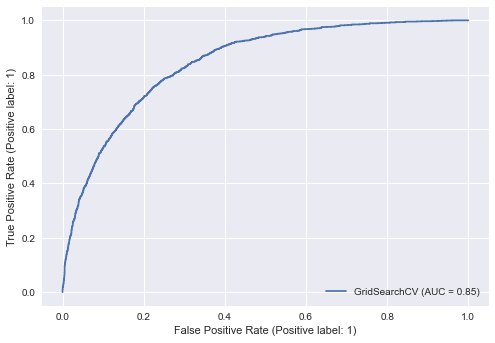

knn
Accuracy in the outer folds: ['0.73', '0.74', '0.74', '0.74', '0.74'].
Average Accuracy: 0.74

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      4399
           1       0.50      0.69      0.58      1587

    accuracy                           0.74      5986
   macro avg       0.69      0.72      0.70      5986
weighted avg       0.77      0.74      0.75      5986



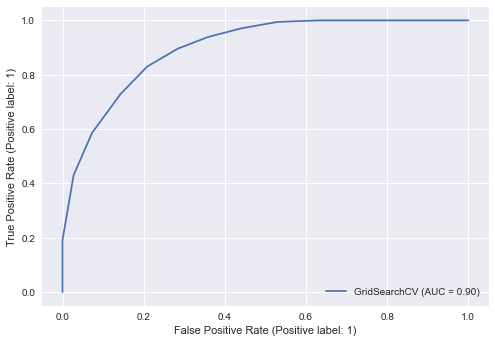

svm
Accuracy in the outer folds: ['0.78', '0.76', '0.76', '0.77', '0.76'].
Average Accuracy: 0.76

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      4399
           1       0.54      0.73      0.62      1587

    accuracy                           0.76      5986
   macro avg       0.71      0.75      0.72      5986
weighted avg       0.80      0.76      0.77      5986



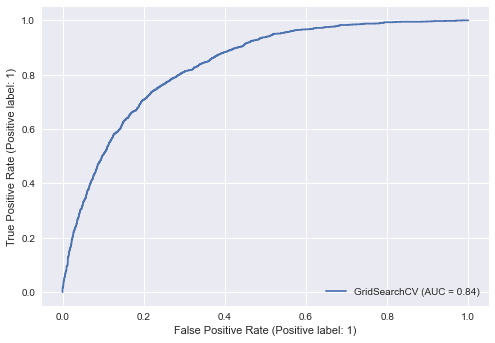

In [264]:
avg_outer_score = dict()

for name, (pipe, params) in models_params.items():
    originalclass = []
    predictedclass = []
    # compute nested cross validation using GridSearchCV to find the optimal model for that pipeline
    optimised_model = GridSearchCV(pipe, params, cv=inner_cv, scoring='precision')
    scores = cross_val_score(optimised_model, x, y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
    # get the average of the outer fold scores
    avg_outer_score[name] = np.mean(scores)
    rounded_scores = [f"{score:.2f}" for score in scores] #rounded scores for print statement
    print(f"{name}\nAccuracy in the outer folds: {rounded_scores}.\nAverage Accuracy: {np.mean(scores):.2f}")
    print()
    print(classification_report(originalclass, predictedclass)) 
    # plot roc curve
    roc_mod = optimised_model.fit(x,y)   
    metrics.plot_roc_curve(roc_mod,x,y)
    plt.show()

In [177]:
# picking best model
best_model, best_model_score = max(avg_outer_score.items(),key=(lambda name_averagescore: name_averagescore[1]))
best_model, best_model_params = models_params[name]

print(f"The best model is:\n{best_model} \nWith an average score of: {best_model_score}")

The best model is:
Pipeline(steps=[('scaler', StandardScaler()), ('sampling', SMOTE()),
                ('classifier', SVC())]) 
With an average score of: 0.7834946297295827


# Checking trained model is fair or not?

In [178]:
#%pip install fairlearn

In [179]:
from fairlearn.widget import FairlearnDashboard

In [181]:
ground_truth = y
best_model.fit(x,y)
predicted_outcomes = best_model.predict(x)

In [224]:
# loading interactive dashboard
FairlearnDashboard(                                      
    sensitive_features=x['gender'],                                # specifying sensitive features
    sensitive_feature_names=['gender'],
    y_true=ground_truth,
    y_pred=predicted_outcomes
)

C:\Users\obero\miniconda3\envs\ce802\lib\site-packages\fairlearn\widget\_fairlearn_dashboard.py:47: UserWarning: The FairlearnDashboard will move from Fairlearn to the raiwidgets package after the v0.5.0 release. Instead, Fairlearn will provide some of the existing functionality through matplotlib-based visualizations.
  warn("The FairlearnDashboard will move from Fairlearn to the "


FairlearnWidget(value={'true_y': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0…

In [223]:
FairlearnDashboard(
    sensitive_features=x['SeniorCitizen'],                                #specifying sensitive feature
    sensitive_feature_names=['SeniorCitizen'],
    y_true=ground_truth,
    y_pred=predicted_outcomes
)

C:\Users\obero\miniconda3\envs\ce802\lib\site-packages\fairlearn\widget\_fairlearn_dashboard.py:47: UserWarning: The FairlearnDashboard will move from Fairlearn to the raiwidgets package after the v0.5.0 release. Instead, Fairlearn will provide some of the existing functionality through matplotlib-based visualizations.
  warn("The FairlearnDashboard will move from Fairlearn to the "


FairlearnWidget(value={'true_y': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0…

# Optimizing the model using TresholdOptimizer

In [226]:
from fairlearn.postprocessing import ThresholdOptimizer

In [228]:
optimizer = ThresholdOptimizer(estimator=best_model, constraints='demographic_parity')

In [231]:
optimizer.fit(x, y, sensitive_features=x['SeniorCitizen'])    #fitting the model on the data

C:\Users\obero\miniconda3\envs\ce802\lib\site-packages\fairlearn\postprocessing\_interpolated_thresholder.py:66: UserWarning: The value of `prefit` is `True`, but `check_is_fitted` raised `NotFittedError` on the base estimator.

If the provided base estimator has been fitted, this could mean that (1) its implementation does not conform to the sklearn estimator API, or (2) the enclosing InterpolatedThresholder has been cloned (for instance by `sklearn.model_selection.cross_validate`).

In case (1), please file an issue with the base estimator developers, but continue to use the enclosing InterpolatedThresholder with `prefit=True`. In case (2), please use `prefit=False`.
  warn(BASE_ESTIMATOR_NOT_FITTED_WARNING.format(type(self).__name__))


ThresholdOptimizer(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('sampling', SMOTE()),
                                             ('classifier', SVC())]))

# Measuring fairness of the optimized model

In [232]:
FairlearnDashboard(
    sensitive_features=x['SeniorCitizen'],
    sensitive_feature_names=['SeniorCitizen'],
    y_true=ground_truth,
    y_pred=optimizer.predict(x, sensitive_features=x['SeniorCitizen'])
)

C:\Users\obero\miniconda3\envs\ce802\lib\site-packages\fairlearn\widget\_fairlearn_dashboard.py:47: UserWarning: The FairlearnDashboard will move from Fairlearn to the raiwidgets package after the v0.5.0 release. Instead, Fairlearn will provide some of the existing functionality through matplotlib-based visualizations.
  warn("The FairlearnDashboard will move from Fairlearn to the "


FairlearnWidget(value={'true_y': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0…

# Comparing new model to oldmodel

In [233]:
comparison = {
    'Original model': best_model.predict(x),
    'TresholdOptimizer': optimizer.predict(x, sensitive_features=x['SeniorCitizen'])
}

In [234]:
FairlearnDashboard(
    sensitive_features=x['SeniorCitizen'],
    sensitive_feature_names=['SeniorCitizen'],
    y_true=ground_truth,
    y_pred=comparison
)

C:\Users\obero\miniconda3\envs\ce802\lib\site-packages\fairlearn\widget\_fairlearn_dashboard.py:47: UserWarning: The FairlearnDashboard will move from Fairlearn to the raiwidgets package after the v0.5.0 release. Instead, Fairlearn will provide some of the existing functionality through matplotlib-based visualizations.
  warn("The FairlearnDashboard will move from Fairlearn to the "


FairlearnWidget(value={'true_y': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0…